In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('churn_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# know about our data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# check for any nulls

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No nulls in the data

# check for the duplicates

In [6]:
df.duplicated().sum()

0

No duplicates in the data

# working with categorical data

first I will drop the customer id column as it's an irrelevant column

In [7]:
df.drop(['customerID'] ,axis = 1 , inplace = True)

convert the total charges column into numeric as it contains a numeric data:

In [8]:
df = df[df['TotalCharges'] != ' ']

In [9]:
def to_numeric(a):
    return float(a)
df['TotalCharges'] = df['TotalCharges'].apply(to_numeric)

lets have a look for the data distribution of the categorical data

Value counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

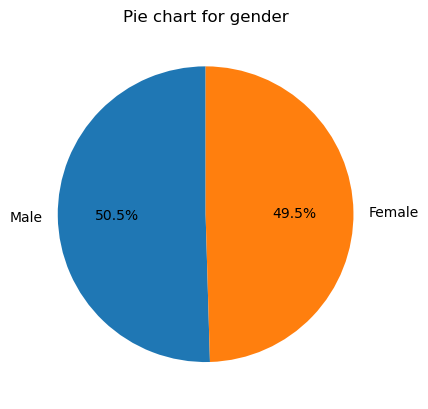

Value counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

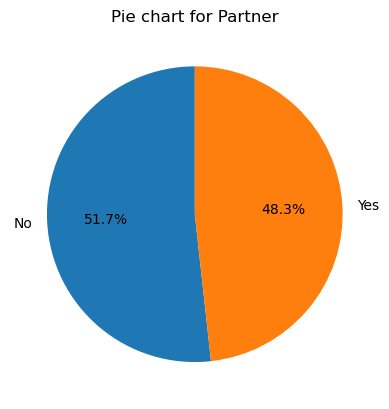

Value counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

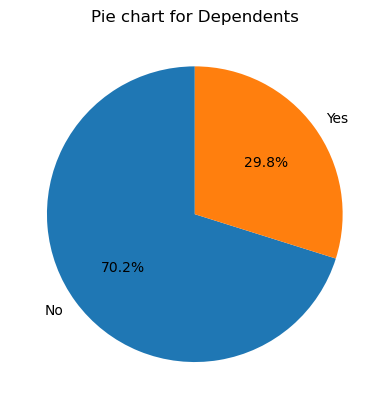

Value counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

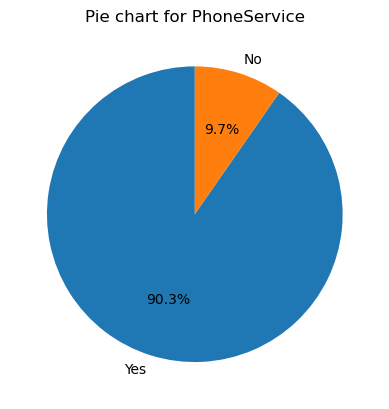

Value counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

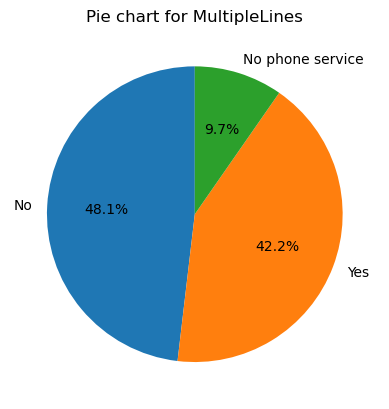

Value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

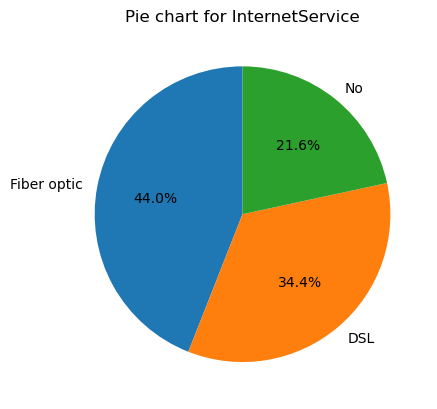

Value counts for OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

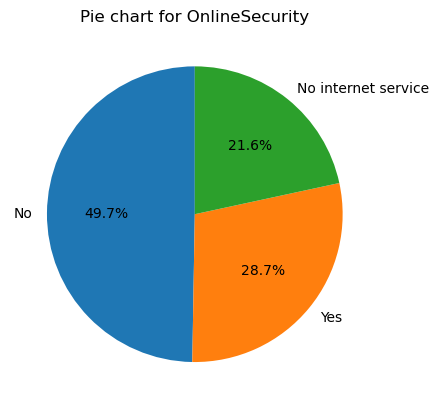

Value counts for OnlineBackup:
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

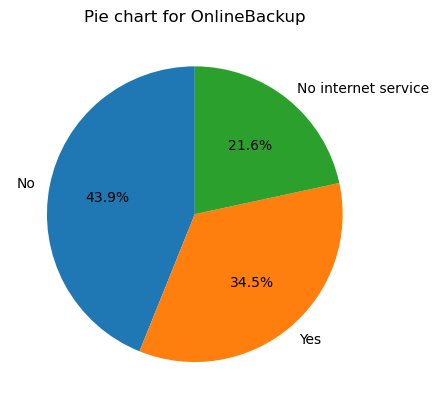

Value counts for DeviceProtection:
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

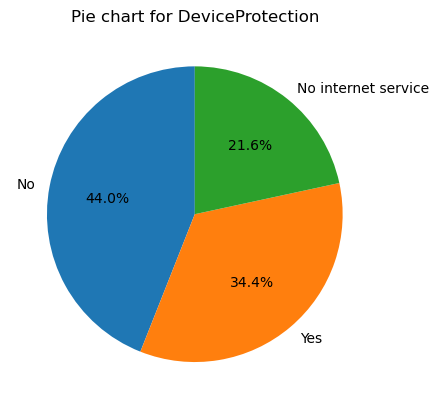

Value counts for TechSupport:
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

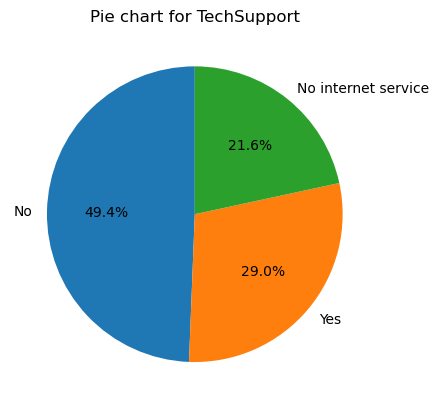

Value counts for StreamingTV:
StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

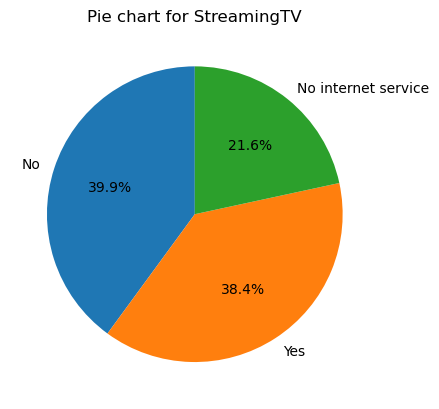

Value counts for StreamingMovies:
StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

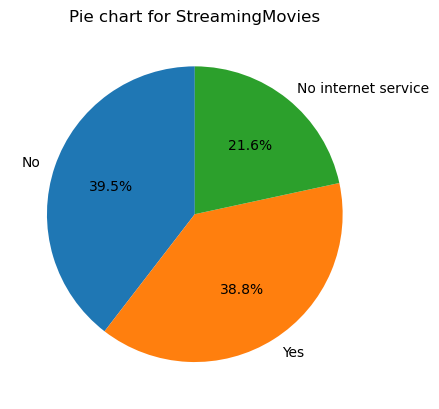

Value counts for Contract:
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

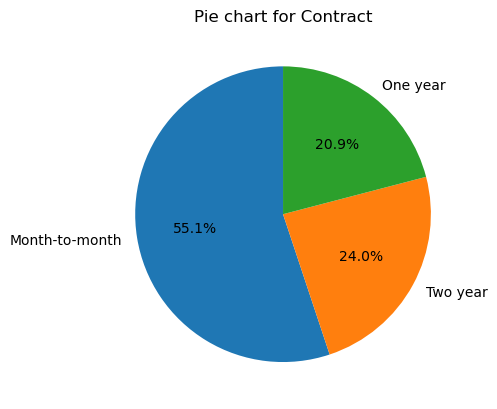

Value counts for PaperlessBilling:
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

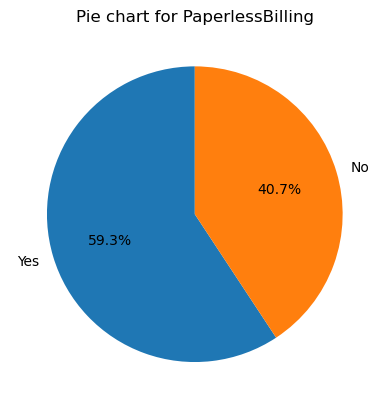

Value counts for PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

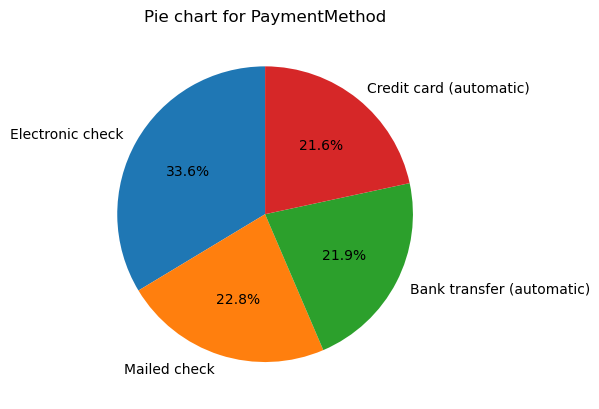

Value counts for Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

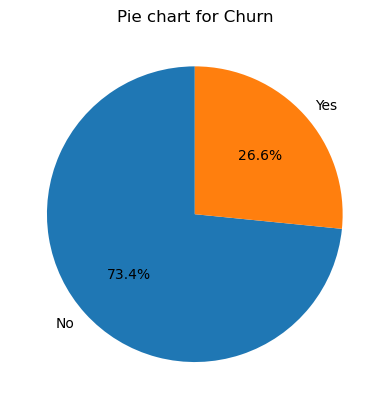

In [10]:
for column in df.select_dtypes(include='object').columns:
    # Get value counts for the current column
    value_counts = df[column].value_counts()

    # Print value counts
    print(f"Value counts for {column}:\n{value_counts}\n")

    # Plot a pie chart
    plt.figure()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie chart for {column}")
    plt.show()

******************** gender ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

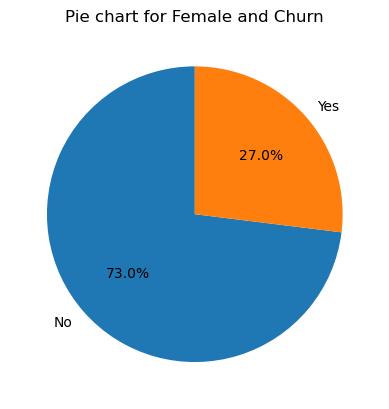

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

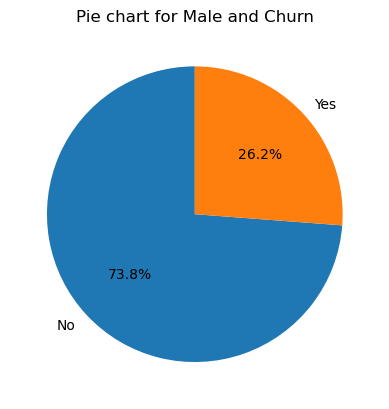

******************** Partner ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

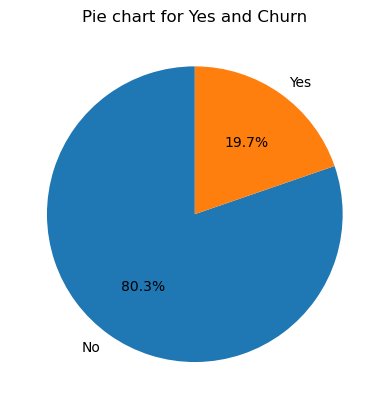

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

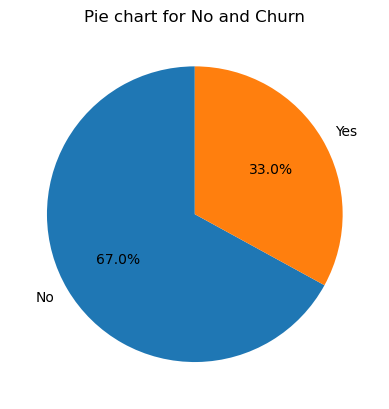

******************** Dependents ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

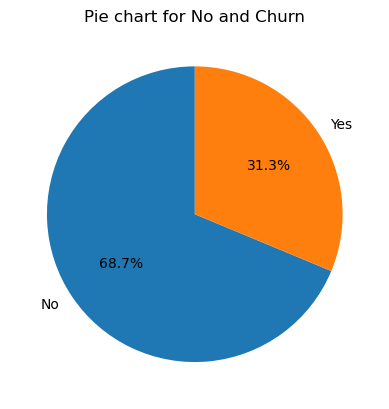

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

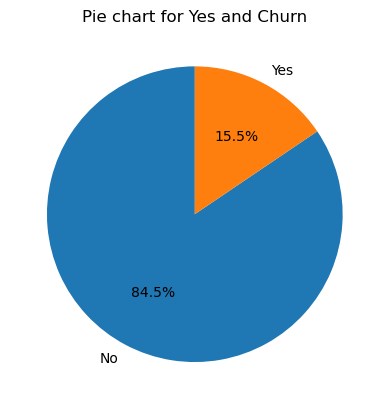

******************** PhoneService ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

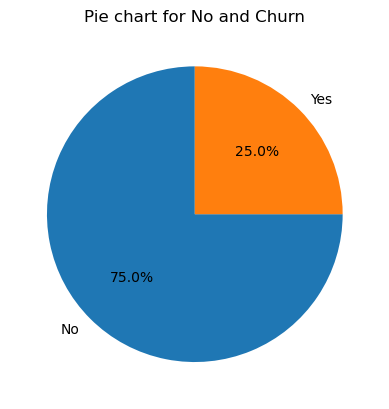

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

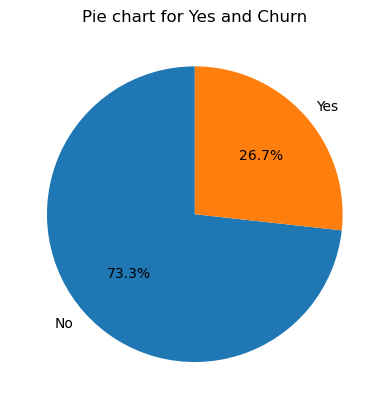

******************** MultipleLines ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

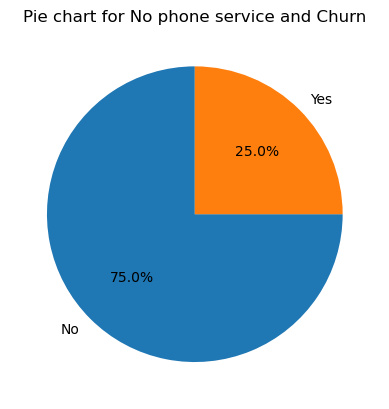

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

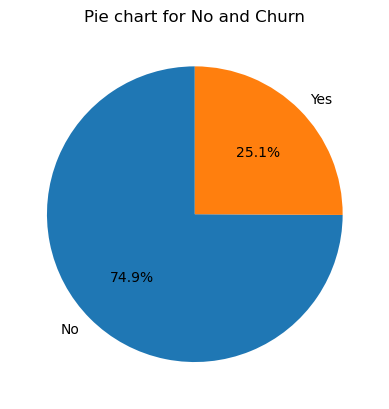

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

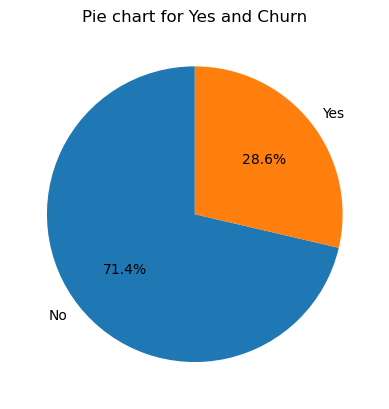

******************** InternetService ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

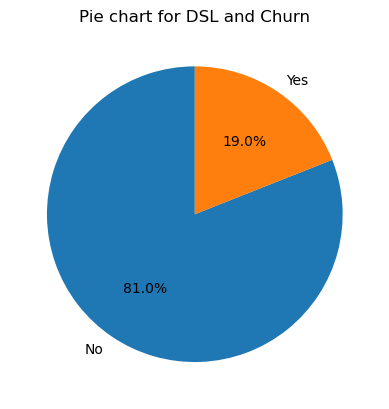

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

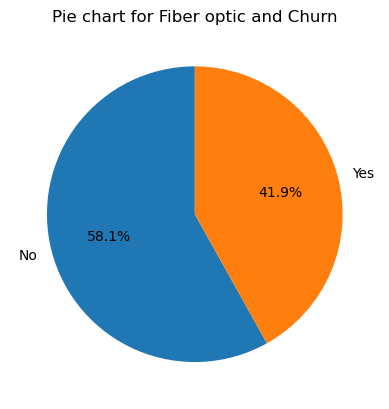

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

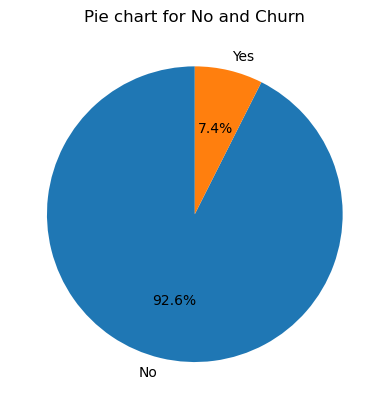

******************** OnlineSecurity ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

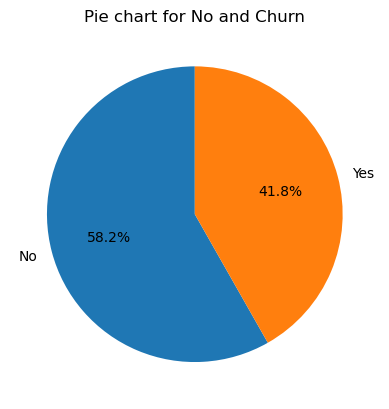

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

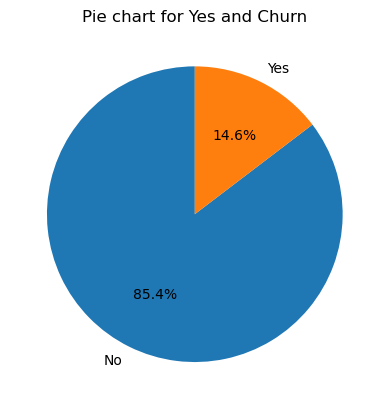

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

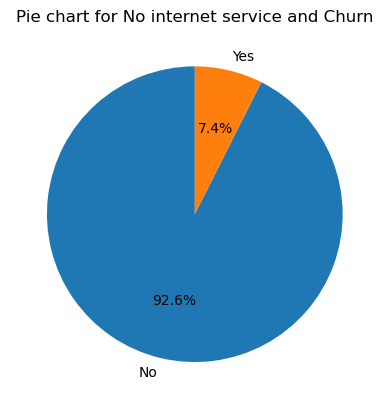

******************** OnlineBackup ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

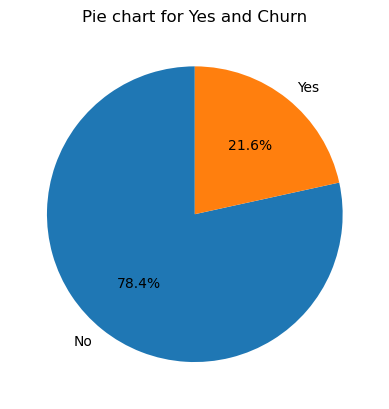

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

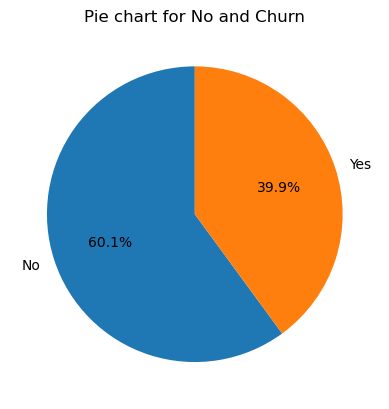

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

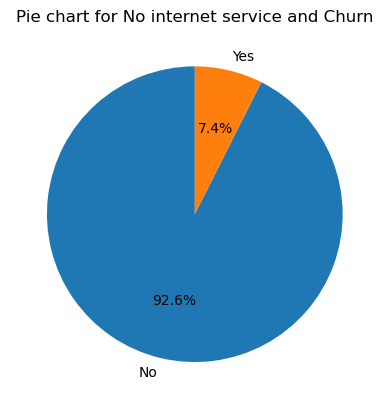

******************** DeviceProtection ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

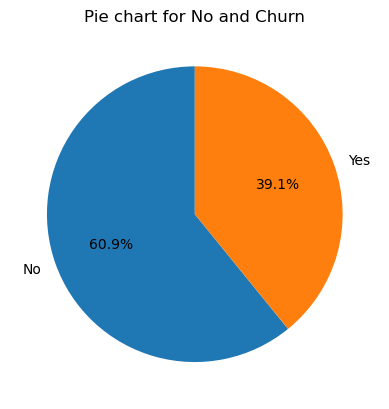

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

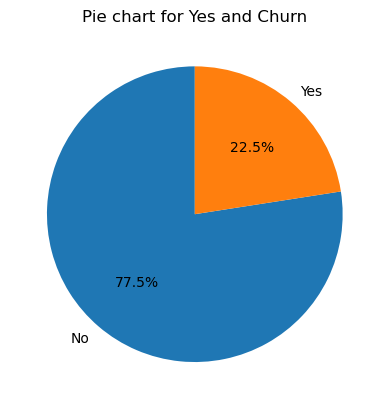

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

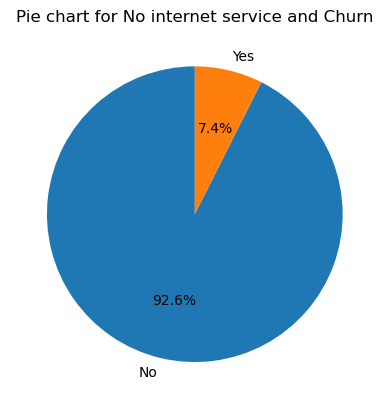

******************** TechSupport ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

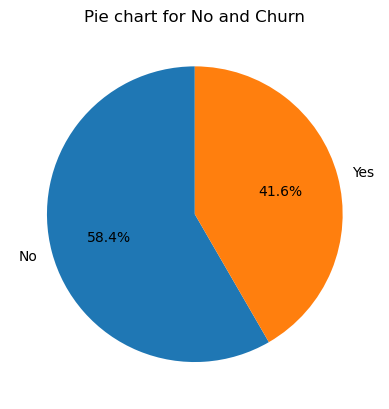

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

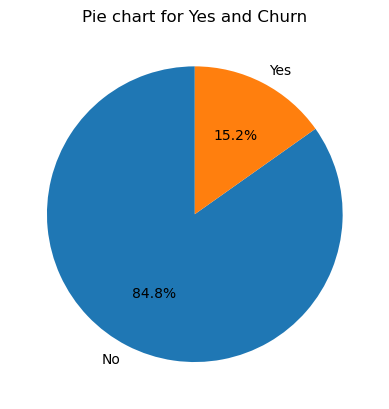

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

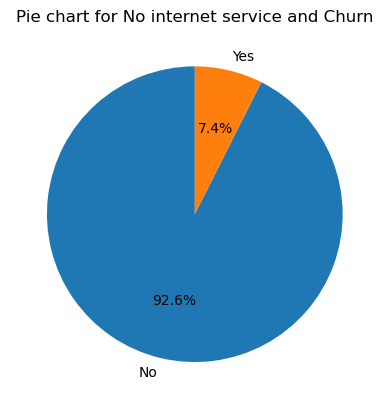

******************** StreamingTV ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

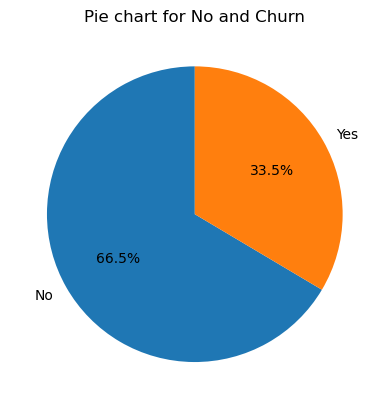

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

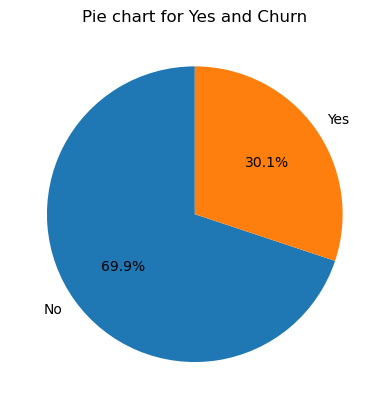

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

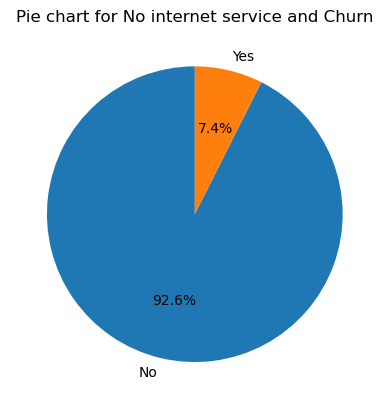

******************** StreamingMovies ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

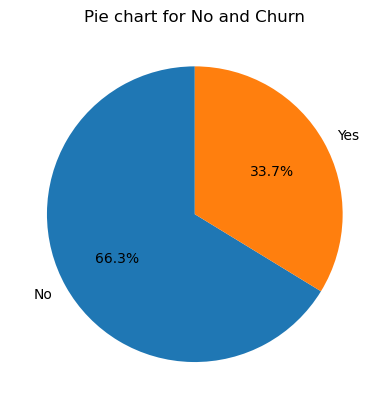

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

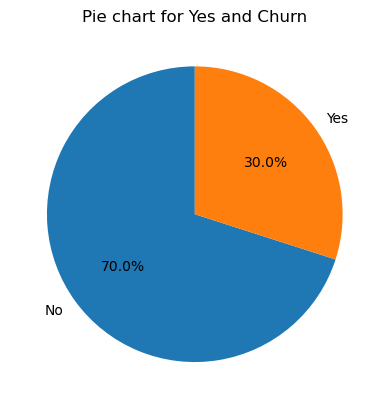

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

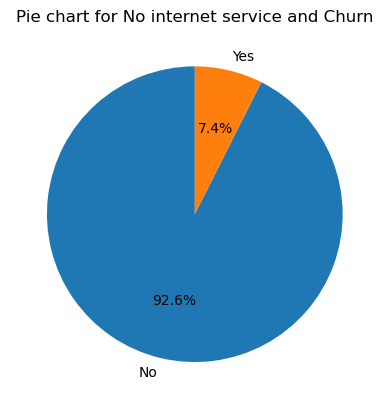

******************** Contract ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

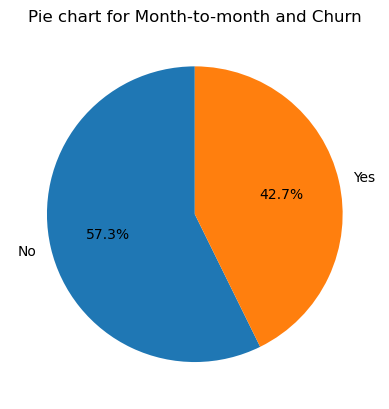

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

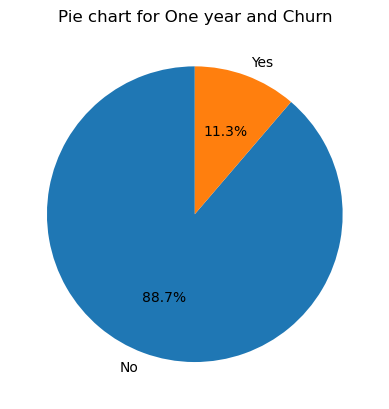

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

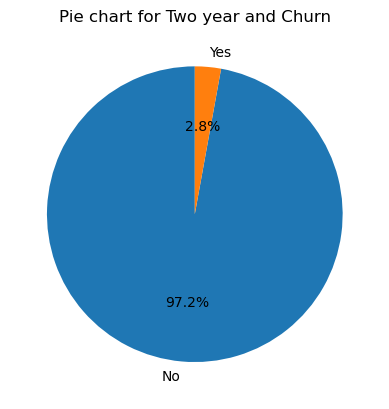

******************** PaperlessBilling ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

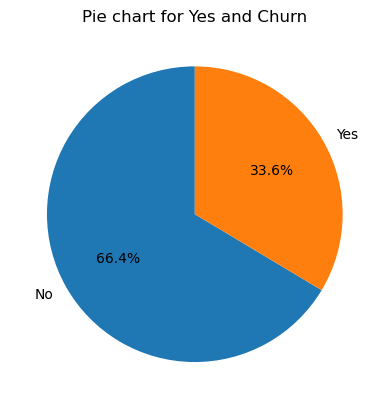

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

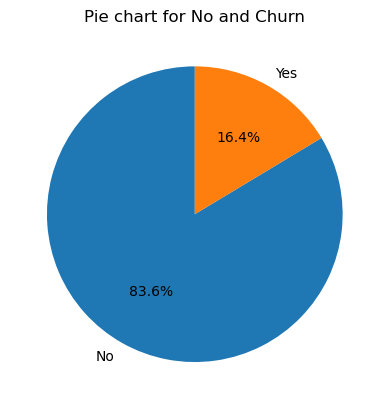

******************** PaymentMethod ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

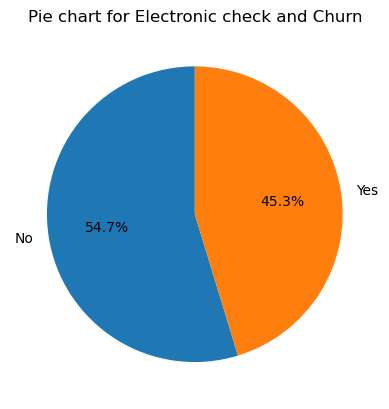

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

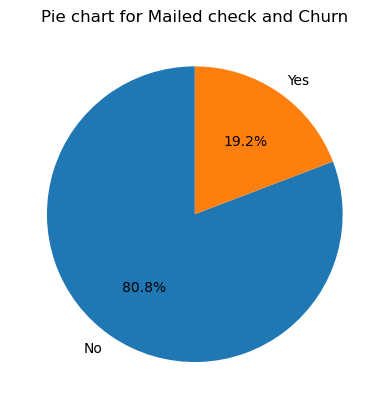

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

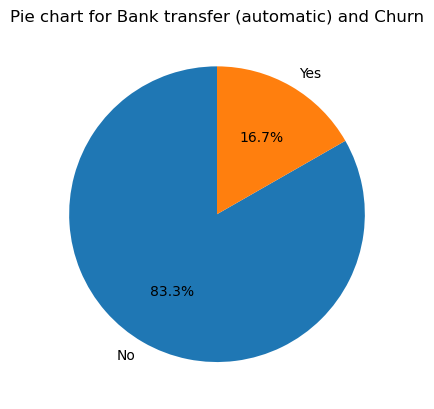

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

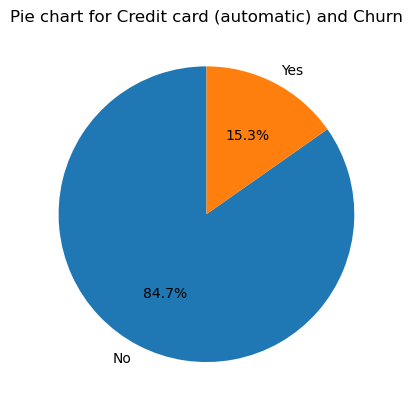

******************** Churn ********************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

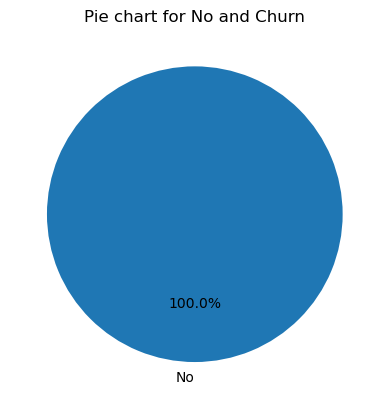

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

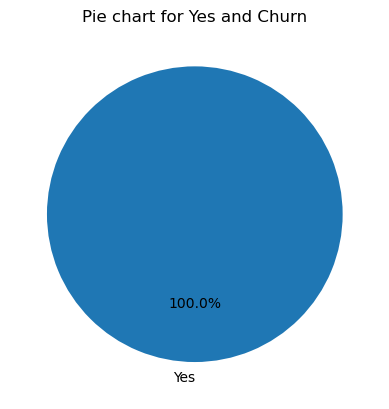

In [11]:
for column in df.select_dtypes(include='object').columns:
    print('*'*20 , column , '*'*20)
    for category_value in df[column].unique():
        # Create a subset of the DataFrame for the current category value
        subset_df = df[df[column] == category_value]

        # Count the occurrences of Churn (1) and No Churn (0)
        churn_counts = subset_df['Churn'].value_counts()

        # Plot a pie chart
        plt.figure()
        plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f"Pie chart for {category_value} and Churn")
        plt.show()

In [12]:
for column in df.select_dtypes(include='object').columns:
    contingency_table = pd.crosstab(df[column], df['Churn'])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(column)
    # Output the results
    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")

    # Interpret the results
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {column} and Churn.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {column} and Churn.")


gender
Chi-squared value: 0.47545453727386294
P-value: 0.490488470706551
Fail to reject the null hypothesis. There is no significant relationship between gender and Churn.
Partner
Chi-squared value: 157.50315146557506
P-value: 3.97379757451591e-36
Reject the null hypothesis. There is a significant relationship between Partner and Churn.
Dependents
Chi-squared value: 186.32163933855873
P-value: 2.0196592017051303e-42
Reject the null hypothesis. There is a significant relationship between Dependents and Churn.
PhoneService
Chi-squared value: 0.8737327674431736
P-value: 0.34992398942431924
Fail to reject the null hypothesis. There is no significant relationship between PhoneService and Churn.
MultipleLines
Chi-squared value: 11.271540824020612
P-value: 0.0035679273999811405
Reject the null hypothesis. There is a significant relationship between MultipleLines and Churn.
InternetService
Chi-squared value: 728.6956143058694
P-value: 5.831198962237274e-159
Reject the null hypothesis. There is

dropping these columns with no relation to our target

In [13]:
df.drop(['gender' , 'PhoneService'] ,axis = 1 , inplace = True)

getting the dummies for the data

In [14]:
df_dummies = pd.get_dummies(df , drop_first=True , dtype=int)

In [15]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


# The numerical data 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

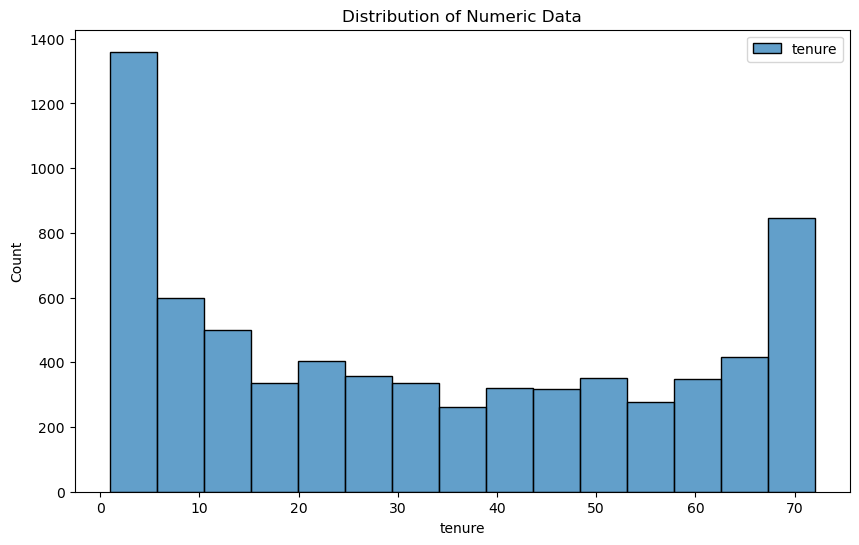

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

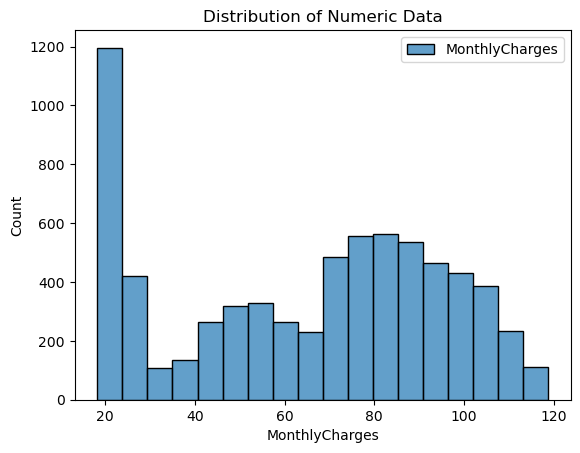

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

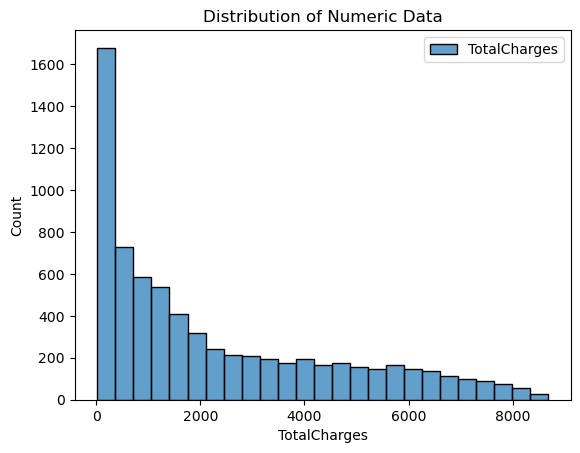

In [16]:
plt.figure(figsize=(10, 6))
for column in df.select_dtypes(include='number').columns:
    if len(df[column].unique()) > 2:
        sns.histplot(df[column], label=column, alpha=0.7)
        plt.title("Distribution of Numeric Data")
        plt.legend()
        plt.show()

Check for outliers :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

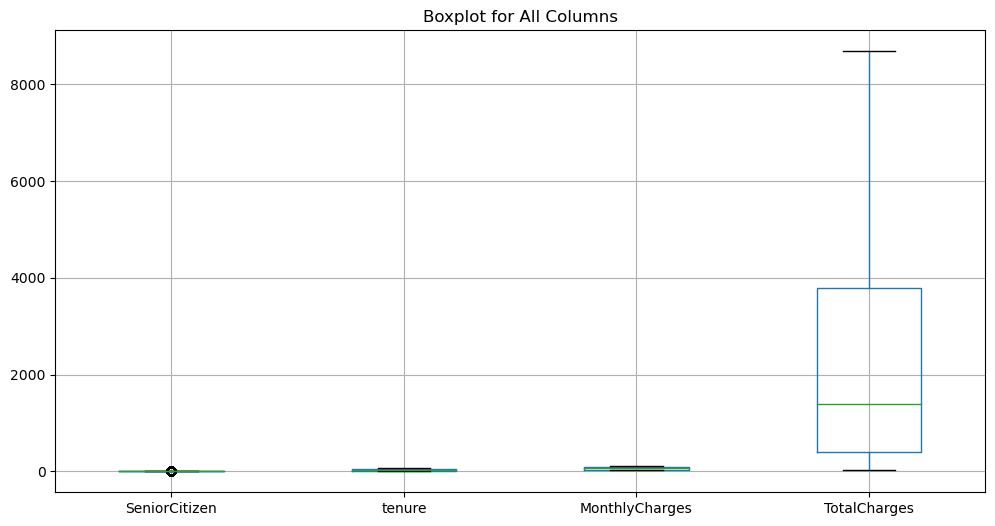

In [17]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot for All Columns")
plt.show()

# the model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score, jaccard_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

X = df_dummies.drop('Churn_Yes' , axis = 1)
y = df_dummies['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Hyperparmater Tuning

In [19]:
def Prune_model(grid, model):
    gcv = GridSearchCV(estimator = model, param_grid = grid,cv = 3, n_jobs = -1)
    gcv.fit(X_train, y_train)
    print(gcv.best_params_)
    return gcv

# KNN model

In [24]:
k_grid={'leaf_size': range(1,20),
        'p': [1,2],
        'n_neighbors': range(1,21,3)}
k_model = KNeighborsClassifier()
k_grid_model= Prune_model(k_grid, k_model)
k_grid_model.score(X_train, y_train),k_grid_model.score(X_test, y_test)

{'leaf_size': 1, 'n_neighbors': 16, 'p': 1}


(0.7996444444444445, 0.8038379530916845)

# Decision tree

In [25]:
grid = {'max_depth': [10, 20, 30, None],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [10, 20, 30]}

ct_model = DecisionTreeClassifier()
ct_grid = Prune_model(grid,ct_model)
ct_grid.score(X_train, y_train),ct_grid.score(X_test, y_test)

{'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}


(0.8229333333333333, 0.7931769722814499)

# Random forest

In [26]:
random_grid={'max_depth': [10, 20, 30, None],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [4,7],
             'n_estimators': [250,300,350]}
rf_model = RandomForestClassifier()
rf_grid = Prune_model(random_grid, rf_model)
rf_grid.score(X_train, y_train),rf_grid.score(X_test, y_test)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 300}


(0.8496, 0.8081023454157783)

# Logistic regression

In [27]:
grid = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}
LR_model = LogisticRegression()
LR_grid = Prune_model(grid, LR_model)
LR_grid.score(X_train, y_train),LR_grid.score(X_test, y_test)

{'C': 0.08858667904100823, 'max_iter': 100, 'solver': 'liblinear'}


(0.8062222222222222, 0.8038379530916845)

# XG Boost

In [33]:
xgboost_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 5, 10]
}

xgboost_model = XGBClassifier()
xgboost_grid_result = Prune_model(xgboost_grid, xgboost_model)

# Evaluate the model
xgboost_train_score = xgboost_grid_result.score(X_train, y_train)
xgboost_test_score = xgboost_grid_result.score(X_test, y_test)

print("XGBoost Training Accuracy:", xgboost_train_score)
print("XGBoost Test Accuracy:", xgboost_test_score)


{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 50}
XGBoost Training Accuracy: 0.8232888888888888
XGBoost Test Accuracy: 0.8088130774697939


# Gradient Boost

In [35]:
gradient_boost_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gradient_boost_model = GradientBoostingClassifier()
gradient_boost_grid_result = Prune_model(gradient_boost_grid, gradient_boost_model)

gradient_boost_train_score = gradient_boost_grid_result.score(X_train, y_train)
gradient_boost_test_score = gradient_boost_grid_result.score(X_test, y_test)

print("Gradient Boosting Training Accuracy:", gradient_boost_train_score)
print("Gradient Boosting Test Accuracy:", gradient_boost_test_score)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Gradient Boosting Training Accuracy: 0.8446222222222223
Gradient Boosting Test Accuracy: 0.8130774697938877


# Naive Bayes

In [21]:
naive_bayes_grid = {
    'var_smoothing': np.logspace(-10, -5, 6)
}

naive_bayes_model = GaussianNB()
naive_bayes_grid_result = Prune_model(naive_bayes_grid, naive_bayes_model)

naive_bayes_train_score = naive_bayes_grid_result.score(X_train, y_train)
naive_bayes_test_score = naive_bayes_grid_result.score(X_test, y_test)

print("Naive Bayes Training Accuracy:", naive_bayes_train_score)
print("Naive Bayes Test Accuracy:", naive_bayes_test_score)


{'var_smoothing': 1e-05}
Naive Bayes Training Accuracy: 0.7644444444444445
Naive Bayes Test Accuracy: 0.7569296375266524


# SVM

In [20]:
svm_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'max_iter': [100, 500, 1000, 2000]
}

svm_model = SVC()
svm_grid_result = Prune_model(svm_grid, svm_model)

svm_train_score = svm_grid_result.score(X_train, y_train)
svm_test_score = svm_grid_result.score(X_test, y_test)

print("SVM Training Accuracy:", svm_train_score)
print("SVM Test Accuracy:", svm_test_score)


{'C': 29.763514416313132, 'kernel': 'rbf', 'max_iter': 2000}
SVM Training Accuracy: 0.7845333333333333
SVM Test Accuracy: 0.7739872068230277


In [37]:
df_dummies.to_csv('Churn version 2.csv' , index=False)